# Testing FFT functions

In [100]:
# Import all necessary packages 

import numpy as np
import matplotlib.pyplot as plt    


In [101]:
''' Do FFT over full interval '''
def fft_full(udata,f_s,hanning):
    from scipy.fft import fft, fftfreq
    import numpy as np

    N = len(udata)                                               # Number of sample points

    T_window = N*f_s
    
    if (hanning == True):
        w = np.hanning(N)                                       # hanning window
        wms = np.mean(w**2)                                     # window spectral power correction
    else:
        w = 1.                                    
        wms = np.mean(w**2)  

    """ 
    Do FFTs - remember to normalise by N and multiply by hanning window
    """
    
    bu_fft = fft(udata*w*(1/N))


    """ 
    Frequencies from FFT
    """
    freq = fftfreq(N, f_s)[:N//2]
    df = freq[1]-freq[0]
    
    """ 
    Multiply each element of fft array by correspondong complex coefficient
    """
    bu_fft = fft(udata*w*(1/N))[0:N//2]
    #bmag_fft = bmag_fft[1:n_f+1]*Bcal_c

    """ 
    take absolute values and square to get power density
    """
    total = abs(bu_fft) * abs(bu_fft)

    """ 
    divide array by correction for spectral power lost by using a hanning window
    """
    total= total/wms
    
    """ 
    find B field magnitude
    """
    
    mag = total*2*T_window
    

    return mag,freq, bu_fft

In [102]:
""" FFT with overlapping windows """

def fft_windows(udata,f_s,n_windows):
    from scipy.fft import fft, fftfreq,rfftfreq
    import numpy as np

   
    N = len(udata)                                                       # Number of sample points
    box_size = int(N/n_windows)                                          # Number of samples in each box 
    N_box = int(N/box_size)                                              # Number of boxes
    half_window = int(box_size/2)                                        # Size of half-window
    
                                                     # Time between samples

    """ 
    Frequencies from FFT boxes
    """
    
    freq = rfftfreq(box_size, f_s)[:box_size//2]
    n_f = len(freq)
    df = freq[1] - freq[0]

                                       
    """ 
    Do FFTs - remember to normalise by N and multiply by hanning window and complex correction
    """

    w = np.hanning(box_size)                                            # hanning window
    wms = np.mean(w**2)                                                 # hanning window correction

    n_bins = (2*N_box)-1
    fft_box = np.zeros((n_bins,n_f),dtype = complex)
    print('Number of bins',np.shape(fft_box))
    # Doing the first window
    # Remember to normalise the box size
    

    fft_box[0,:] = (fft(w*(1/box_size)*udata[0:box_size]))[0:box_size//2]
   
    
    # Doing remainder of overlapping windows, and multiplying by complex callibration
    for i in range(0,n_bins):                                               
        if i > 0:                                            
            index_start = i*half_window-1
            index_end = (i*half_window)+box_size-1
        else: 
            index_start = i*half_window
            
            index_end = (i*half_window)+box_size
        
                                                
        fft_box[i,:] = (fft(w*(1/box_size)*udata[index_start:index_end]))[0:box_size//2]
        

    fft_av = fft_box
    #for i in range(1,n_bins-1):

        #fft_av[i,:] = (fft_box[i,:]+fft_box[i+1,:])/2.
       
    
    T_window = box_size*f_s

    print('the frequency bands for little bins are',df)


    """ 
    take absolute values and square to get power density
    """
    total = abs(fft_av) * abs(fft_av)

    """ 
    divide array by correction for spectral power lost by using a hanning window
    """
    total= total/wms
    
    """ 
    find B field magnitude
    """
    
    mag = total*2*T_window
    t_array = np.linspace(0.,6.- 6./(2*n_bins),n_bins)

    return mag,freq,fft_av,t_array,df


In [103]:
def average_windows(mag,frequency):
    n_f = len(frequency)
    averaged_spec = np.zeros_like(frequency)  
    for m in range(n_f):
        averaged_spec[m] = np.sum(mag[:,m])/len(mag[:,m])
    print(len(mag[:,m]))
    return averaged_spec

In [104]:
# Firstly - with a stationary sine wave

duration = 6.                                           # sampling duration, s
f_s = 1./35000.                                         # sampling rate, Hz
n_s = int(duration/f_s)                                 # number of samples over total duration

# define tiem array with sampling rate, f_s - this means time array starts at f_S seconds
t = np.linspace(0.,duration-f_s, n_s)
print(t)
# set wave frequency tp 10 Hz
f0 = 3000

# angular frequency
omega0 = 2*np.pi*f0

# stationary sine wave signal at 10 f0
u0 = np.sin(omega0*t)

# Do FFT over entire duration 

mag_nh,freq_nh, bu_fft_nh = fft_full(u0,f_s,hanning=False)
mag_h,freq_h, bu_fft_h = fft_full(u0,f_s,hanning=True)


[0.00000000e+00 2.85714286e-05 5.71428571e-05 ... 5.99991429e+00
 5.99994286e+00 5.99997143e+00]


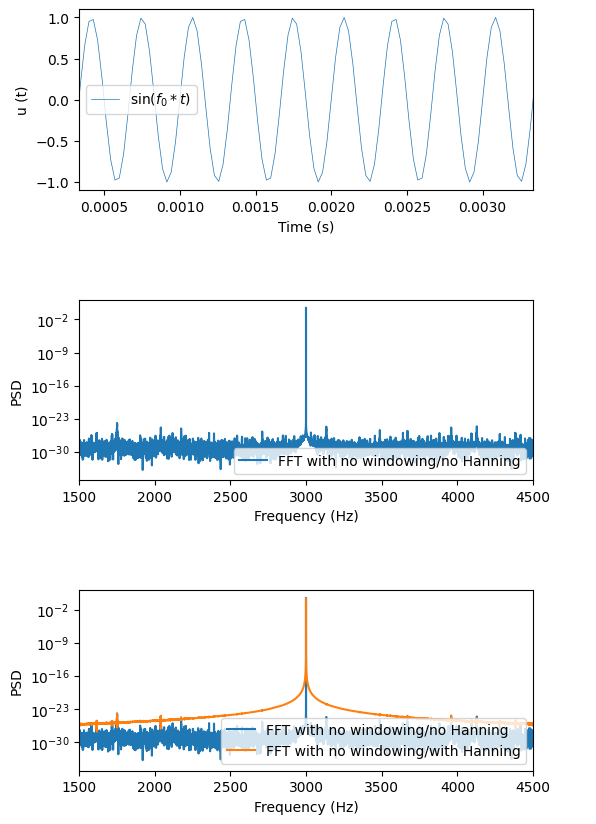

In [105]:

""" Creating the plots for the FFT over the full interval """

# create figure
fig, axs = plt.subplots(3,2,gridspec_kw={"width_ratios":(1,0.05)})

# Name plot axis
ax1,ax2,ax3= axs[:, 0]

# Name colourbar axis (the third/fourth one will be made invisible)
cax1,cax2,cax3 = axs[:,1]


ax1.plot(t, u0, label=r'$\sin(f_0*t)$',linewidth = 0.5)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("u (t)")
ax1.set_xlim(1/f0,10/f0) 

ax1.legend()
cax1.axis('off')

ax2.plot(freq_nh,mag_nh,label="FFT with no windowing/no Hanning")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("PSD")
ax2.set_yscale('log')
ax2.set_xlim(f0-f0/2,f0+f0/2) 
ax2.legend(loc='lower right')
cax2.axis('off')

ax3.plot(freq_nh,mag_nh,label="FFT with no windowing/no Hanning")
ax3.plot(freq_h,mag_h,label="FFT with no windowing/with Hanning")
ax3.set_xlim(f0-f0/2,f0+f0/2) 
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("PSD")
ax3.set_yscale('log')

ax3.legend(loc='lower right')
cax3.axis('off')

plt.tight_layout()
plt.gcf().set_size_inches((6, 9))
plt.show()


In [106]:
# now add in a time varying term 
def create_ft(t,max_t):
    
    f_steps = 10
    for k in range(0,len(t)):
        for i in range(0,f_steps+1):
            fraction = i/(f_steps)
            if (t[k]/max_t<fraction):
                f = 0.25*fraction*f0*t
                return f
        

f_t = create_ft(t,6.)

w_t = 2.*np.pi*f_t
u_t = np.sin(w_t*t)

# Adding stationary and non-stationary together, and doing FFT with and without hanning...

mag_nh,freq_nh, bu_fft_nh = fft_full(u0+u_t,f_s,hanning=False)
mag_h,freq_h, bu_fft_h = fft_full(u0+u_t,f_s,hanning=True)


Text(0.5, 1.0, 'Frequency variation of new wave component')

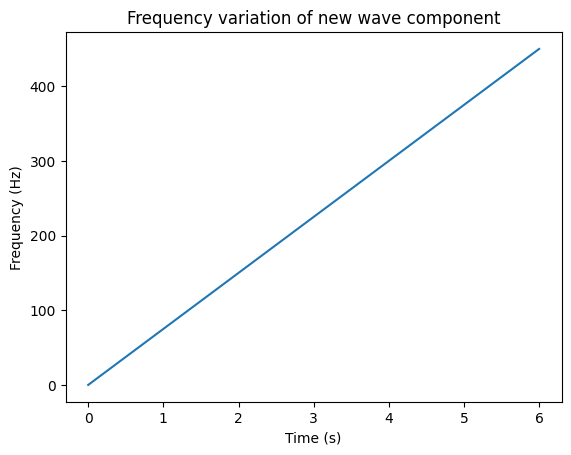

In [107]:
plt.plot(t,f_t)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Frequency variation of new wave component')

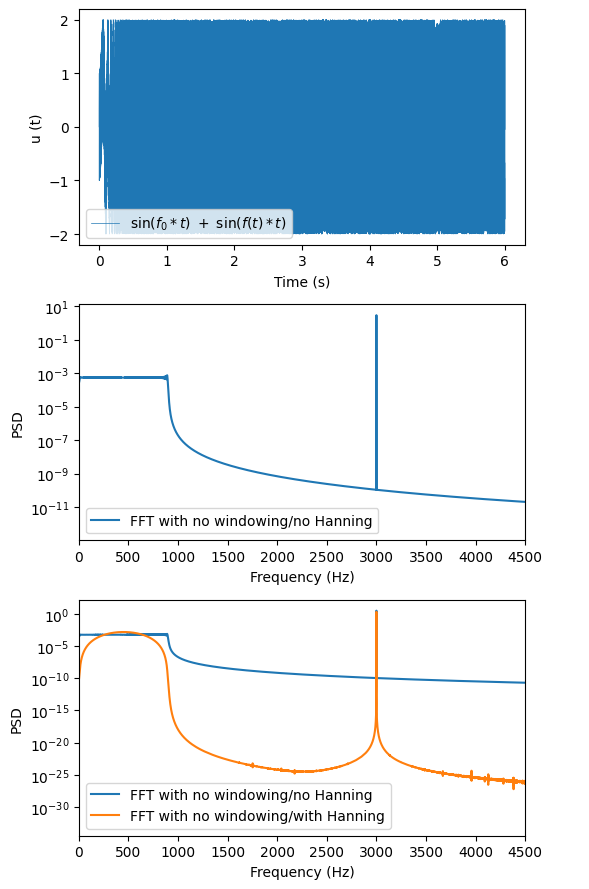

In [108]:

""" Creating the plots for the FFT over the full interval """

# create figure
fig, axs = plt.subplots(3,2,gridspec_kw={"width_ratios":(1,0.05)})

# Name plot axis
ax1,ax2,ax3= axs[:, 0]

# Name colourbar axis (the third/fourth one will be made invisible)
cax1,cax2,cax3 = axs[:,1]


ax1.plot(t, u_t+u0, label=r'$\sin(f_0*t)\ +\ \sin(f(t)*t)$',linewidth = 0.5)
ax1.plot()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("u (t)")
#for i in range(6):
 #   ax1.axvline(x=i*6/5., ymin=0, ymax=1,color='red',linestyle = 'dotted')
  #  if i<5:
   #     ax1.axvline(x=i*6/5.+ 6/10, ymin=0, ymax=1,color='red')
#ax1.set_xlim(0,0.5)
ax1.legend()
cax1.axis('off')

ax2.plot(freq_nh,mag_nh,label="FFT with no windowing/no Hanning")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("PSD")
ax2.set_yscale('log')
ax2.set_xlim(0,f0+f0/2)
ax2.legend()
cax2.axis('off')

ax3.plot(freq_nh,mag_nh,label="FFT with no windowing/no Hanning")
ax3.plot(freq_h,mag_h,label="FFT with no windowing/with Hanning")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("PSD")
ax3.set_yscale('log')
ax3.set_xlim(0,f0+f0/2)
ax3.legend()
cax3.axis('off')


plt.gcf().set_size_inches((6, 9))
plt.tight_layout()
plt.show()

Number of bins (9, 21000)
the frequency bands for little bins are 0.8333333333333334
9
Number of bins (19, 10500)
the frequency bands for little bins are 1.6666666666666667
Number of bins (29, 7000)
the frequency bands for little bins are 2.5
Number of bins (39, 5250)
the frequency bands for little bins are 3.3333333333333335
Number of bins (49, 4200)
the frequency bands for little bins are 4.166666666666667


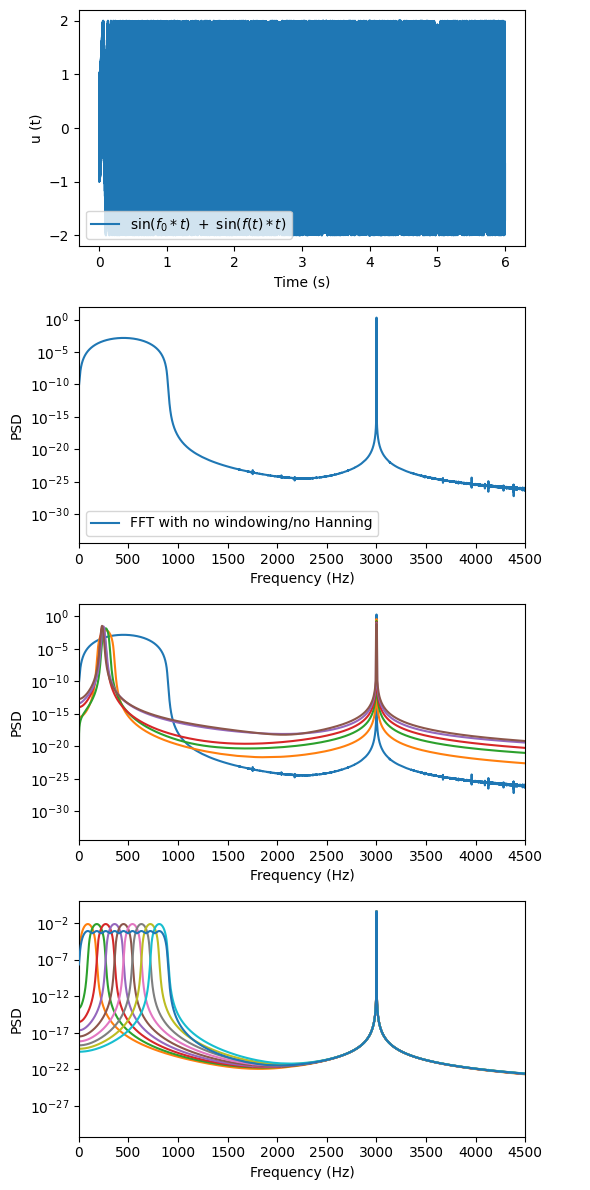

In [109]:

""" Creating the plots for the FFT over the full interval """

# create figure
fig, axs = plt.subplots(4,2,gridspec_kw={"width_ratios":(1,0.05)})

# Name plot axis
ax1,ax2,ax3,ax4= axs[:, 0]

# Name colourbar axis (the third/fourth one will be made invisible)
cax1,cax2,cax3,cax4 = axs[:,1]


ax1.plot(t, u_t+u0, label=r'$\sin(f_0*t)\ +\ \sin(f(t)*t)$')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("u (t)")
ax1.legend()
cax1.axis('off')

ax2.plot(freq_h,mag_h,label="FFT with no windowing/no Hanning")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("PSD")
ax2.set_yscale('log')
ax2.set_xlim(0,f0+f0/2)
ax2.legend()
cax2.axis('off')

ax3.plot(freq_h,mag_h,label="FFT with no windowing/no Hanning")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("PSD")
ax3.set_yscale('log')
ax3.set_xlim(0,f0+f0/2)
cax3.axis('off')

for i in range(1,6):

    mag_windows,freq_windows,fft_av_windows,t_array_windows,df = fft_windows(u0+u_t,f_s,5*i)


    
    ax3.plot(freq_windows,mag_windows[int((5*i)/2),:],label="Overlapping windows "+str(5*i)+" bins")
    
    if (5*i == 5):
        average = average_windows(mag_windows,freq_windows)
        ax4.plot(freq_windows,average,label="Average of spectrum",zorder = (2*5*i))
        
        for j in range((2*5*i)-1):
       
            ax4.plot(freq_windows,mag_windows[j,:],label="Window number: "+ str(j+1))
            ax4.set_xlabel("Frequency (Hz)")
            ax4.set_ylabel("PSD")
            ax4.set_yscale('log')
            ax4.set_xlim(0,f0+f0/2)
            cax4.axis('off')
       


#ax3.legend()
#ax3.legend(loc='center left',bbox_to_anchor=(1., 0.5),fontsize = 6)
#ax4.legend()
#ax4.legend(loc='center left',bbox_to_anchor=(1.1, 0.5),fontsize = 6)

plt.gcf().set_size_inches((6, 12))
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Number of bins (9, 21000)
the frequency bands for little bins are 0.8333333333333334
Number of bins (19, 10500)
the frequency bands for little bins are 1.6666666666666667
Number of bins (29, 7000)
the frequency bands for little bins are 2.5
Number of bins (39, 5250)
the frequency bands for little bins are 3.3333333333333335
Number of bins (49, 4200)
the frequency bands for little bins are 4.166666666666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


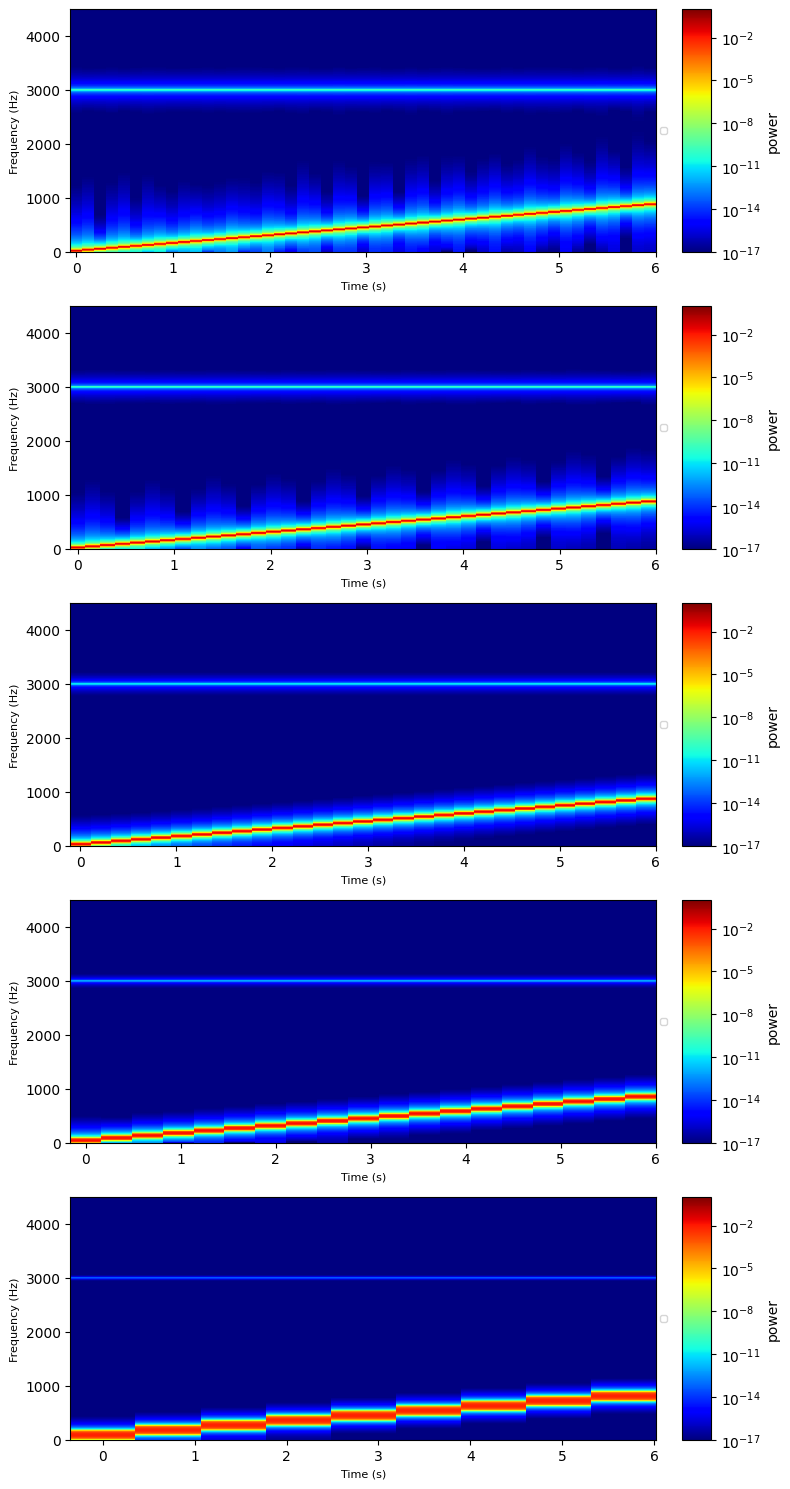

In [110]:
# for plotting
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

fig, axs = plt.subplots(5,2,gridspec_kw={"width_ratios":(1,0.05)})

# Name plot axis
ax1,ax2,ax3,ax4,ax5= axs[:, 0]

# Name colourbar axis (the third/fourth one will be made invisible)
cax1,cax2,cax3,cax4,cax5 = axs[:,1]


for i in range(1,6):

    mag_windows,freq_windows,fft_av_windows,t_array_windows,df = fft_windows(u0+u_t,f_s,5*i)
    
   
    colorbar_norm = mcolors.LogNorm(vmin=10**(-17), vmax=10**(0))

    window_plot = axs[5-i,0].pcolormesh(t_array_windows, freq_windows, np.transpose(mag_windows), norm=colorbar_norm, cmap="jet",label = "FFT spectrum "+str(5*i)+" windows")
    axs[i-1,0].set_ylabel('Frequency (Hz)',fontsize=8)
    axs[i-1,0].set_xlabel('Time (s)',fontsize=8)
    plt.colorbar(window_plot,label='power',cax=axs[i-1,1])
    axs[i-1,0].set_ylim(0,f0+f0/2)
    axs[i-1,0].legend()
    axs[i-1,0].legend(loc='center left',bbox_to_anchor=(1., 0.5),fontsize = 6)

plt.gcf().set_size_inches((8, 15))
plt.tight_layout()
plt.show()

In [111]:
def integrate_in_small_windows(B,freq,time_array):

    n_f = len(freq)
    n_bins = len(time_array)

    dist=[]
    
    for n in range(n_bins):
        high_res_bint=0 
        # Integrate in frequency 
        for m in range(1,n_f-1):
                
            high_res_bint = high_res_bint + 0.5*(B[n,m]+B[n,m+1])*(freq[m+1]-freq[m])
                    
        dist.append(high_res_bint)
    
    

    return dist

In [112]:
def rebin(bin_edges,mag,frequency_original):
    """ 
    Doing the rebinning
    """
    import pandas as pd

    # Create dataframe
    rebin_dat=pd.DataFrame()

    rebin_dat['Data'] = mag
    
    # Create and save frequencies to one column
    rebin_dat['Frequency']= frequency_original
    
    """
    pd.cut() bins all frequencies according to defined semi_log bins
    groupby() groups all data in frame by these bines
    then select the DATA and take the MEAN in each bin
    to_numpy saves this to an array
    """
    
    rebinned=rebin_dat.groupby(pd.cut(rebin_dat.Frequency,bins=bin_edges)).Data.mean().to_numpy()
    
    return rebinned

In [113]:
def integrate_in_rebin(B,survey_freq):

    integral=0 
    for m in range(0,len(survey_freq)-1):
                        
        integral = integral + 0.5*(B[m]+B[m+1])*(survey_freq[m+1]-survey_freq[m])

    return integral

Number of bins (9, 21000)
the frequency bands for little bins are 0.8333333333333334
9
4 done
1.0000000002881293 1.0000001011688795
Number of bins (19, 10500)
the frequency bands for little bins are 1.6666666666666667
19
3 done
1.0000000002881293 1.0000015866486027
Number of bins (29, 7000)
the frequency bands for little bins are 2.5
29
2 done
1.0000000002881293 1.0000083036367071
Number of bins (39, 5250)
the frequency bands for little bins are 3.3333333333333335
39
1 done
1.0000000002881293 1.0000276225442837
Number of bins (49, 4200)
the frequency bands for little bins are 4.166666666666667
49
0 done
1.0000000002881293 1.0000711158795006


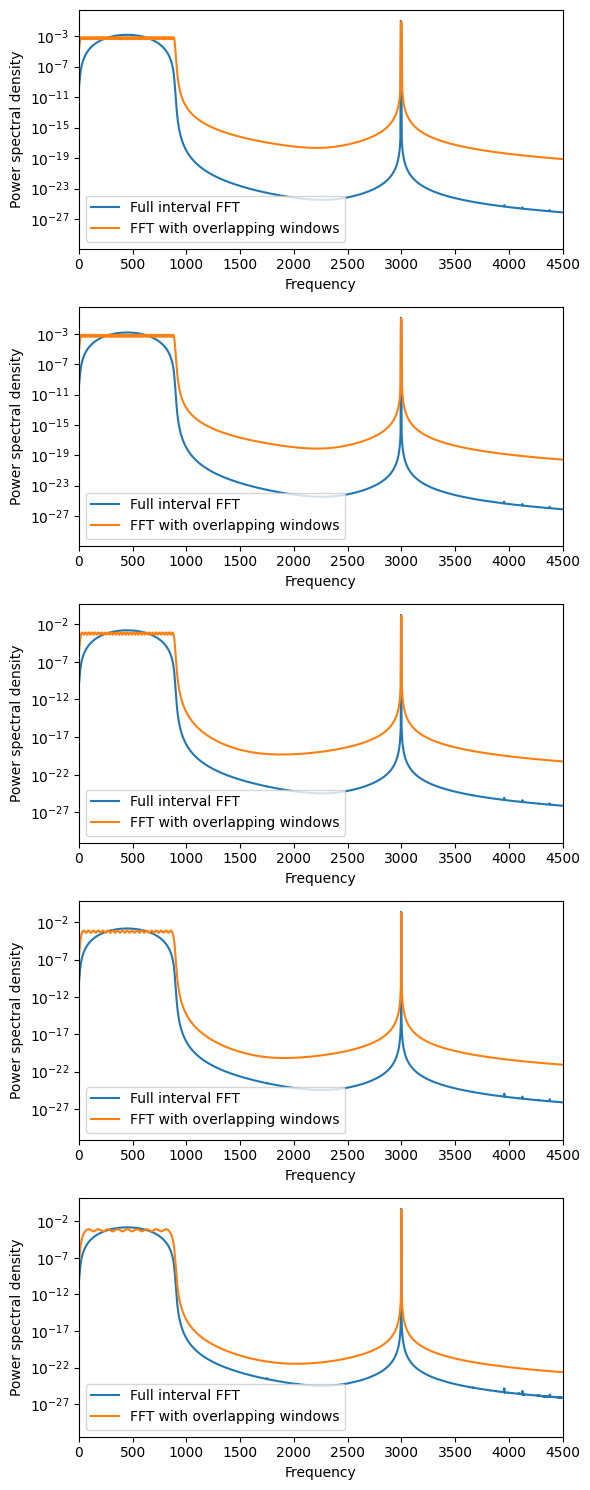

In [114]:
fig, axs = plt.subplots(5,1)


for i in range(1,6):

    mag_windows,freq_windows,fft_av_windows,t_array_windows,df= fft_windows(u0+u_t,f_s,5*i)

    bin_edges = list(freq_windows)
    bin_edges.append(bin_edges[-1]+df)

    rebinned_fullFFT = rebin(bin_edges,mag_h,freq_h)

    #dist_original = integrate_in_rebin(rebinned_fullFFT,freq_windows)
    dist_original = integrate_in_rebin(mag_h,freq_h)
    av_windows = average_windows(mag_windows,freq_windows)

    # integrate dist windows in frequency

    dist_windows = integrate_in_rebin(av_windows,freq_windows)



    axs[5-i].plot(freq_windows,rebinned_fullFFT,label = "Full interval FFT")
    axs[5-i].plot(freq_windows,av_windows,label = "FFT with overlapping windows")
    axs[5-i].set_xlim(0,f0+f0/2)

    axs[5-i].set_yscale('log')
    axs[5-i].set_xlabel("Frequency")
    axs[5-i].set_ylabel("Power spectral density")
    axs[5-i].legend(loc='lower left')
    print(5-i,'done')
    print(dist_original,dist_windows)
    
#plt.tight_layout()
plt.gcf().set_size_inches((6, 15))
plt.tight_layout()
plt.show()

    